<a href="https://colab.research.google.com/github/dmorton714/api_class_demo/blob/main/rick_n_mort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import json
import numpy as np


site url: https://rickandmortyapi.com/documentation/

In [ ]:
# url = 'https://rickandmortyapi.com/api'
url = 'https://rickandmortyapi.com/api/character'

In [ ]:
requests.get(url)

<Response [200]>

In [ ]:
r = requests.get(url)

In [ ]:
json = r.json()

In [ ]:
json.keys()

dict_keys(['info', 'results'])

In [ ]:
json['info']

{'count': 826,
 'pages': 42,
 'next': 'https://rickandmortyapi.com/api/character?page=2',
 'prev': None}

In [ ]:
# json['results']

In [ ]:
df = pd.json_normalize(json, ['results'])

In [ ]:
df.shape

(20, 14)

In [ ]:
url = 'https://rickandmortyapi.com/api/character'
results = []
page = 1

while True:
    response = requests.get(f'{url}?page={page}')
    data = response.json()

    if 'results' in data and len(data['results']) > 0:
        results.extend(data['results'])
        page += 1
    else:
        break

df = pd.DataFrame(results)
df.shape

(826, 12)

- we defined the base ```URL``` of the Rick and Morty API for retrieving character information.


-  ```results = []``` initializes an empty list called results where we will store the character information obtained from the API.


-   ```page = 1``` initializes a variable called page with the value 1. This variable will be used to keep track of the page number we're requesting from the API.

-  ```While True:``` starts an infinite loop. The loop will continue until explicitly broken using the break statement.


- ```response = requests.get(f'{url}?page={page}')```, sends an HTTP GET request to the API using the specified URL along with the page parameter. The page parameter is used to request different pages of character data.


- ```data = response.json()``` extracts the JSON data from the HTTP response and stores it in the variable data.


- ```if 'results' in data and len(data['results']) > 0:``` checks if the 'results' key is present in the data dictionary and if the 'results' list is not empty. If both conditions are met, it means there are character results on this page.


- ```results.extend(data['results'])``` extends the results list with the character information obtained from the current page's 'results'.


- ```page += 1``` increments the page variable by 1, preparing it for the next page's data retrieval.


- ```else:``` If the 'results' key is not in the data dictionary or the 'results' list is empty, this part of the code is executed.


- ```break``` The break statement ends the loop, as there are no more results to retrieve.


- ```df = pd.DataFrame(results)``` After collecting all the character information, this line converts the results list into a Pandas DataFrame named df.


- ```df.shape``` This retrieves the shape of the DataFrame df, which is a tuple representing the number of rows and columns in the DataFrame.

In [ ]:
df.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z


In [ ]:
# df = pd.json_normalize(results)
# df.head()

In [ ]:
df['gender'].value_counts()

Male          610
Female        148
unknown        49
Genderless     19
Name: gender, dtype: int64

In [ ]:
df['status'].value_counts()

Alive      439
Dead       287
unknown    100
Name: status, dtype: int64

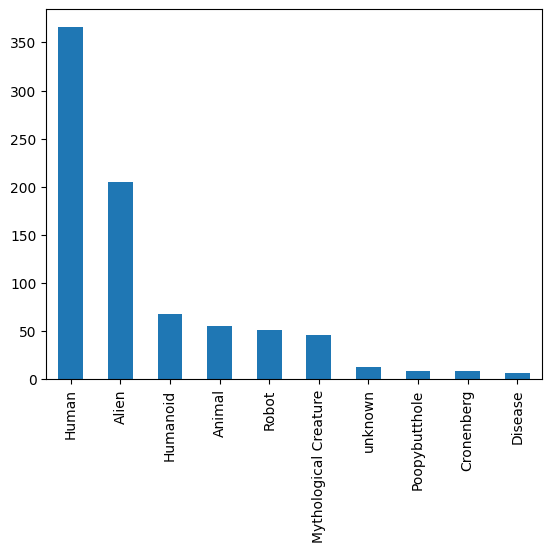

In [ ]:
df['species'].value_counts().plot.bar();